In [2]:
import sys
import os
from py_helpers.general_helpers import *

# Define the path to the data
hpc = False
labs = True
if hpc:
    data_path = "/rds/general/user/hsa22/ephemeral/MBM_fmri/sub-NIHm32/ses-01/fmri_slices/sub-NIHm32_ses-01_task-rest_run-LR-2"
    atlas_path = "/rds/general/ephemeral/user/hsa22/ephemeral/Brain_MINDS/BMCR_STPT_template/Atlases/MBM_mapped/MBM_cortex_vM_80um_TC_std.nii.gz"
elif labs:
    data_path = "/media/hsa22/Expansion/MBM_fmri/sub-NIHm32/ses-01/fmri_slices/sub-NIHm32_ses-01_task-rest_run-LR-2"
    atlas_path = "/media/hsa22/Expansion/Brain-MINDS/BMCR_STPT_template/Atlases/MBM_mapped/MBM_cortex_vM_80um_TC_std.nii.gz"
else:
    data_path = "/mnt/d/MBM_fmri/sub-NIHm32/ses-01/fmri_slices/sub-NIHm32_ses-01_task-rest_run-LR-2"
    atlas_path = "/mnt/d/Brain-MINDS/BMCR_STPT_template/Atlases/MBM_mapped/MBM_cortex_vM_80um_TC_std.nii.gz"

# Define the folder with the registered slices
registration_folder = os.path.join(data_path, "registration")

# Grab all the nii.gz files
nii_gz_files = glob_files(registration_folder, "nii.gz")

# Sort the files according to the number at the end
nii_gz_files = sorted(nii_gz_files, key=lambda x: int(x.split("_")[-1].split(".")[0]))

# Print the number of files
print("Found {} nii files".format(len(nii_gz_files)))

Found 512 nii files


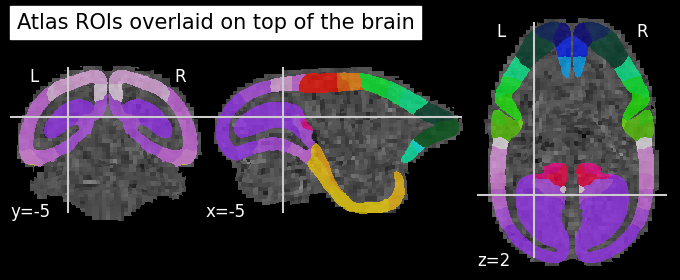

In [6]:
from nilearn import plotting
#https://lukas-snoek.com/NI-edu/fMRI-introduction/week_7/nilearn.html
plotting.plot_roi(atlas_path, bg_img=nii_gz_files[0], title="Atlas ROIs overlaid on top of the brain")

In [3]:
from nilearn.input_data import NiftiLabelsMasker

# Masker object to extract the timeseries
masker = NiftiLabelsMasker(labels_img=atlas_path, standardize=True)

# Get the timeseries BOLD measure
time_series = masker.fit_transform(nii_gz_files[0])

# The result will be a 2D array with shape (# regions x # size of nii_gz_files)
print(time_series.shape)

(1, 54)


/vol/bitbucket/hsa22/miniconda3/envs/diss/lib/python3.11/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


In [4]:
print(type(time_series))

<class 'numpy.ndarray'>


In [13]:
from nilearn.input_data import NiftiLabelsMasker
import numpy as np
import time

masker = NiftiLabelsMasker(labels_img=atlas_path, standardize=True)

# Initialize a list to collect the time series arrays
time_series_list = []

# For every slice
for idx, file in enumerate(nii_gz_files):
    # Get the start time
    start_time = time.time()
    # Get the timeseries BOLD measure
    time_series_per_file = masker.fit_transform(file)
    # Get the end time
    end_time = time.time()
    # Print out current status
    print("Finished file {} of {}, took {} seconds".format(idx + 1, len(nii_gz_files), (end_time - start_time)))
    # Append it to the time series
    time_series_list.append(time_series_per_file)

# Convert the list of arrays to a single 2D numpy array
time_series_array = np.vstack(time_series_list)

# The result will be a 2D array with shape (# regions x # size of nii_gz_files)
print(time_series_array.shape)

/vol/bitbucket/hsa22/miniconda3/envs/diss/lib/python3.11/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


Finished file 1 of 512
Finished file 2 of 512
Finished file 3 of 512
(3, 54)
